# Training and test sets

We've seen previously how to fit a model to a dataset. In this exercise, we'll be looking at how to check and confirm the validity and performance of our models by using training and testing sets.
As usual, we begin by loading in and having a look at our data:

In [2]:
import pandas
import statsmodels
#!pip install statsmodels
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training.csv
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training-switzerland.csv

url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training.csv"
data = pandas.read_csv(url, delimiter="\t")

print(data.shape)
print(data.head())

(50, 5)
   month_old_when_trained  mean_rescues_per_year  age_last_year  \
0                      68                   21.1              9   
1                      53                   14.9              5   
2                      41                   20.5              6   
3                       3                   19.4              1   
4                       4                   24.9              4   

   weight_last_year  rescues_last_year  
0              14.5                 35  
1              14.0                 30  
2              17.7                 34  
3              13.7                 29  
4              18.4                 30  


We're interested in the relationship between a dog's weight and the amount of rescues it performed in the previous year. Let's begin by plotting `rescues_last_year` as a function of `weight_last_year`:

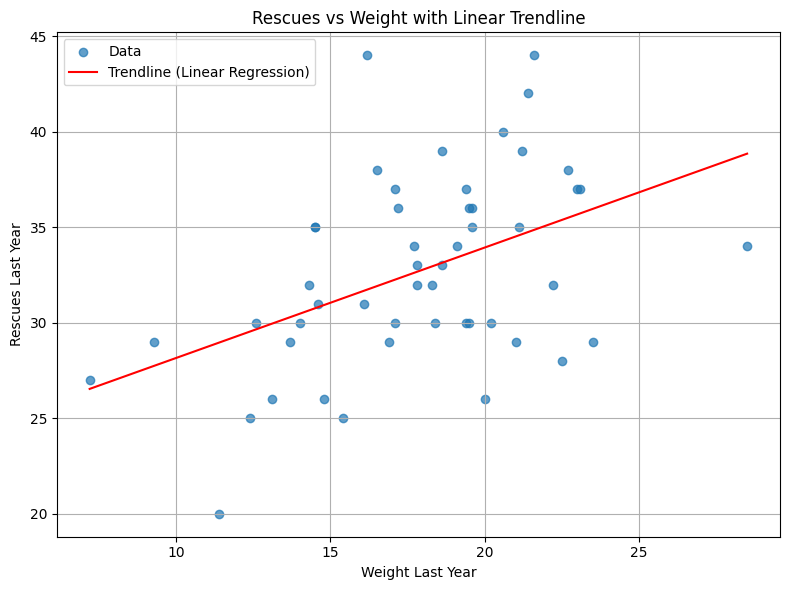

In [4]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

# First, we define our formula using a special syntax
# This says that rescues_last_year is explained by weight_last_year
formula = "rescues_last_year ~ weight_last_year"

model = smf.ols(formula = formula, data = data).fit()

# Extract x and y values
x = data["weight_last_year"]
y = data["rescues_last_year"]

# Scatter plot of the data and trendline
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, label="Data")

x_vals = np.linspace(x.min(), x.max(), 100)
y_vals = model.params.iloc[1] * x_vals + model.params.iloc[0]  # Slope * x + Intercept

plt.plot(x_vals, y_vals, color="red", label="Trendline (Linear Regression)")

plt.xlabel("Weight Last Year")
plt.ylabel("Rescues Last Year")
plt.title("Rescues vs Weight with Linear Trendline")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

There seems to be a pretty clear relationship between a dog's weight and the number of rescues it's performed. 
That seems pretty reasonable, as we'd expect heavier dogs to be bigger and stronger and thus better at saving lives!

# Train/test split

This time, instead of fitting a model to the entirety of our dataset, we're going to separate our dataset into two smaller partitions: a _training set_ and a _test set_.

The _training set_ is the largest of the two, usually made up of between 70-80% of the overall dataset, with the rest of the dataset making up the _test set_.

By splitting our data, we're able to gauge the performance of our model when confronted with previously unseen data. 

Notice that data on the _test set_ is never used in training. For that reason, it's commonly referred to as *unseen data* or data that is *unknown by the model*.

In [5]:
from sklearn.model_selection import train_test_split


# Obtain the label and feature from the original data
dataset = data[['rescues_last_year','weight_last_year']]

# Split the dataset in an 70/30 train/test ratio. We also obtain the respective corresponding indices from the original dataset.
train, test = train_test_split(dataset, train_size=0.7, random_state=21)

print("Train")
print(train.head())
print(train.shape)

print("Test")
print(test.head())
print(test.shape)

Train
    rescues_last_year  weight_last_year
33                 30              19.4
0                  35              14.5
13                 36              19.5
28                 31              16.1
49                 37              23.0
(35, 2)
Test
    rescues_last_year  weight_last_year
7                  37              17.1
44                 25              15.4
43                 26              20.0
25                 32              22.2
14                 32              18.3
(15, 2)


We notice that these sets are different, and that the _training set_ and _test set_ contain 70% and 30% of the overall data, respectively.

Let's have a look at how the _training set_ and _test set_ are separated out:

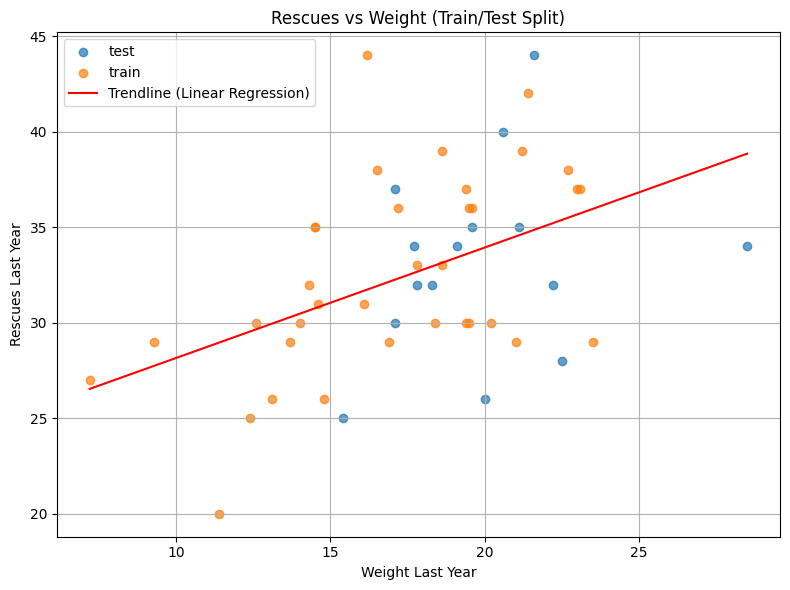

In [7]:
# You don't need to understand this code well
# It's just used to create a scatter plot

# concatenate training and test so they can be graphed
plot_set = pandas.concat([train,test])
plot_set["Dataset"] = ["train"] * len(train) + ["test"] * len(test)

# Scatter plot with color by Dataset
plt.figure(figsize=(8, 6))

for label, group in plot_set.groupby("Dataset"):
    plt.scatter(group["weight_last_year"], group["rescues_last_year"], label=label, alpha=0.7)

# Regression trendline using model coefficients
x_vals = np.linspace(plot_set["weight_last_year"].min(), plot_set["weight_last_year"].max(), 100)
y_vals = model.params.iloc[1] * x_vals + model.params.iloc[0]

plt.plot(x_vals, y_vals, color="red", label="Trendline (Linear Regression)")

plt.xlabel("Weight Last Year")
plt.ylabel("Rescues Last Year")
plt.title("Rescues vs Weight (Train/Test Split)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Training Set

We begin by training our model using the _training set_, testing its performance with the same _training set_:

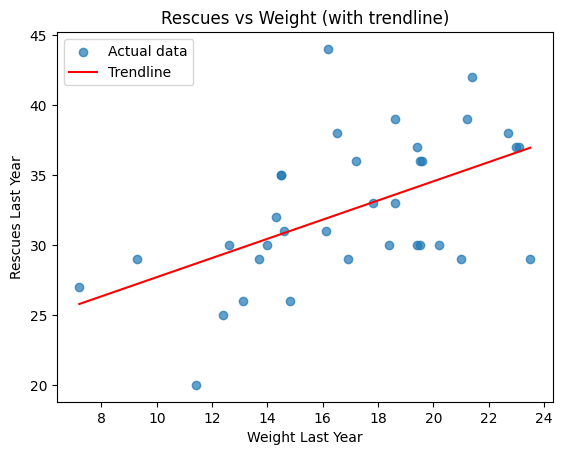

In [9]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error as mse

# First, we define our formula using a special syntax
# This says that rescues_last_year is explained by weight_last_year
formula = "rescues_last_year ~ weight_last_year"

# Create and train the model
model = smf.ols(formula = formula, data = train).fit()

# Graph the result against the data
plt.scatter(train["weight_last_year"], train["rescues_last_year"], label="Actual data", alpha=0.7)

# Create a trendline using the model's parameters
x_vals = np.linspace(train["weight_last_year"].min(), train["weight_last_year"].max(), 100)
y_vals = model.params.iloc[1] * x_vals + model.params.iloc[0]

# Plot the trendline
plt.plot(x_vals, y_vals, color="red", label="Trendline")

plt.xlabel("Weight Last Year")
plt.ylabel("Rescues Last Year")
plt.title("Rescues vs Weight (with trendline)")
plt.legend()
plt.show()

We can gauge our model's performance by calculating the _mean squared error_ (MSE).

In [10]:
# We use the in-buit sklearn function to calculate the MSE
correct_labels = train['rescues_last_year']
predicted = model.predict(train['weight_last_year'])

MSE = mse(correct_labels, predicted)
print('MSE = %f ' % MSE)

MSE = 18.674546 


# Test Set

Next, we test the same model's performance using the _test set_:

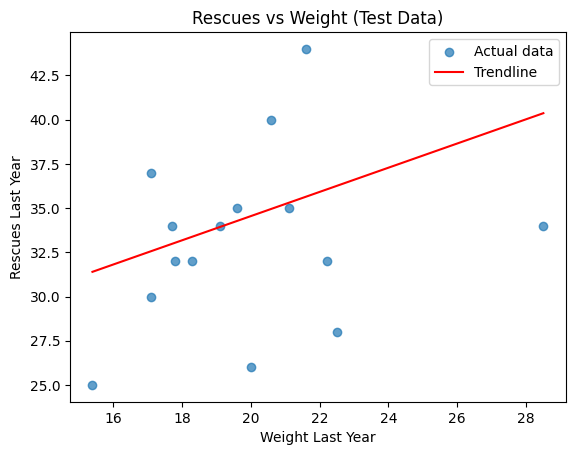

In [11]:
plt.scatter(test["weight_last_year"], test["rescues_last_year"], label="Actual data", alpha=0.7)

# Create a trendline using the model's parameters
x_vals = np.linspace(test["weight_last_year"].min(), test["weight_last_year"].max(), 100)
y_vals = model.params.iloc[1] * x_vals + model.params.iloc[0]

# Plot the trendline
plt.plot(x_vals, y_vals, color="red", label="Trendline")

plt.xlabel("Weight Last Year")
plt.ylabel("Rescues Last Year")
plt.title("Rescues vs Weight (Test Data)")
plt.legend()
plt.show()

Let's have a look at the MSE again.

In [12]:
correct_labels = test['rescues_last_year']
predicted = model.predict(test['weight_last_year'])

MSE = mse(correct_labels, predicted)
print('MSE = %f ' % MSE)

MSE = 24.352949 


We learn that the model performs much better on the known _training data_ than on the unseen _test data_ (remember that higher MSE values are worse).  

The reason can be due to a number of factors, but first and foremost is _overfitting_, which is when a model matches the data in the _training set_ too closely. This means that it will perform very well on the _training set_, but will not _generalize_ well. (that is, it won't work well with other datasets).

# New Dataset

To illustrate our point further, let's have a look at how our model performs when confronted with a completely new, unseen, and larger dataset. For our scenario, we'll use data provided by the avalanche rescue charity's European branch.

In [13]:
# Load an alternative dataset from the charity's European branch

url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training-switzerland.csv"
new_data = pandas.read_csv(url, delimiter="\t")

print(new_data.shape)
new_data.head()


(500, 5)


,month_old_when_trained,mean_rescues_per_year,age_last_year,weight_last_year,rescues_last_year
0,9,16.7,2,15.709342,30
1,33,24.2,8,14.760819,35
2,43,20.2,4,13.118374,19
3,37,19.2,5,10.614075,24
4,45,16.9,8,17.519890,28


The features are the same, but we have much more data this time. Let's see how our model does!

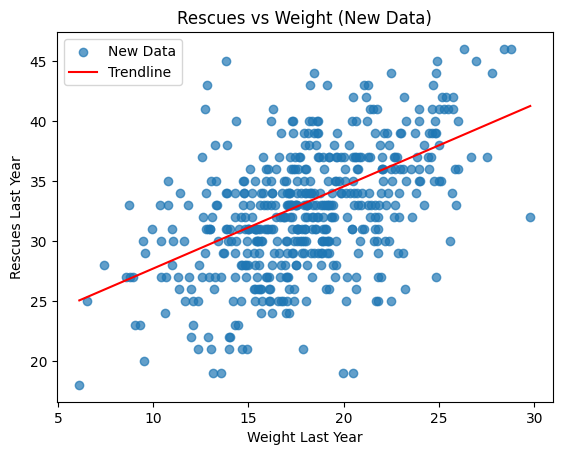

In [14]:
# Plot the fitted model against this new dataset. 

plt.scatter(new_data["weight_last_year"], new_data["rescues_last_year"], label="New Data", alpha=0.7)

# Create a trendline using the model's parameters
x_vals = np.linspace(new_data["weight_last_year"].min(), new_data["weight_last_year"].max(), 100)
y_vals = model.params.iloc[1] * x_vals + model.params.iloc[0]

# Plot the trendline
plt.plot(x_vals, y_vals, color="red", label="Trendline")

plt.xlabel("Weight Last Year")
plt.ylabel("Rescues Last Year")
plt.title("Rescues vs Weight (New Data)")
plt.legend()
plt.show()

And now, the MSE:

In [15]:
correct_labels = new_data['rescues_last_year']
predicted = model.predict(new_data['weight_last_year'])

MSE = mse(correct_labels, predicted)
print('MSE = %f ' % MSE)

MSE = 20.406905 


As expected, the model performs better on the training dataset as it does on the unseen dataset. This is simply due to overfitting, as we noted previously.

Interestingly, the model performs better on this unseen dataset than it does on the _test set_. This is because our previous test set was quite small, and thus not a very good representation of real-world data. By contrast, this unseen dataset is large and a much better representation of data we'll find outside of the lab. In essence, this shows us that part of performance difference we see between training and test is due to model overfitting, and part of the error is due to the test set not being perfect. In the next exercises, we'll explore the trade-off we have to make between training and test dataset sizes. 

# Summary

In this exercise, we covered the following concepts:

 - Splitting a dataset into a _training set_ and a _test set_
 - Training a model using the _training set_ and testing its performance on the _training set_, _test set_, and on a new, unseen dataset
 - Compared the respective MSEs to highlight the effects and dangers of _overfitting_
